# Preprocessing

Sentiment analysis for text data combined natural language processing (NLP) and machine learning techniques to assign weighted sentiment scores to the systems, topics, or categories within a sentence or document. In business setting, sentiment analysis is extremely helpful as it can help understand customer experiences, gauge public opinion, and monitor brand and product reputation.

## Setup
Natural Language Toolkit (NLTK),
Gensim.,
CoreNLP.,
spaCy.,
TextBlob.,
Pattern.,
PyNLPl.

we will be using the [Natural Language Toolkit (NLTK)](http://www.nltk.org/howto/twitter.html) package, an open-source Python library for natural language processing. It has modules for collecting, handling, and processing Twitter data.

we will use a Twitter dataset that comes with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly. 

In [5]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import random                              # pseudo-random number generator

In [6]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/volt/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

## About the Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial. 

--How to collect twitter data--

https://www.nltk.org/howto/twitter.html

https://www.nltk.org/howto/twitter.html#corpus_reader


In [7]:
# nltk.download('twitter_samples')

In [8]:
from nltk.corpus import twitter_samples
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [9]:
from pprint import pprint
pprint(twitter_samples.docs()[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Jul 24 10:42:49 +0000 2015',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 624530164626534400,
 'id_str': '624530164626534400',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web '
           '(M2)</a>',
 'text': 'hopeless for tmr :(',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Sun Mar 08 05:43:40 +0000 2015',
          'default_profile': False,
          'default_profile_image': False,
          'description': '⇨ [V] TravelGency █ 2

In [10]:
# select the set of positive and negative tweets
# https://www.nltk.org/api/nltk.corpus.reader.twitter.html
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [11]:
# check some positive and negative tweets
type(positive_tweets)

list

In [12]:
# print total number of tweets
len(positive_tweets)

5000

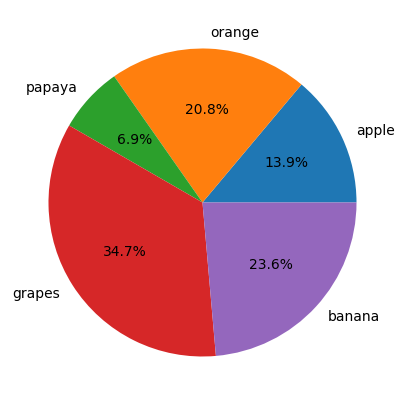

In [13]:
# Try this
# https://www.w3schools.com/python/matplotlib_pie_charts.asp
import numpy as np
import matplotlib.pyplot as plt           
fig = plt.figure(figsize=(5, 5))
quantity= np.array([20, 30, 10, 50, 34])
my_labels= ['apple', 'orange', 'papaya', 'grapes', 'banana']
plt.pie(quantity, labels=my_labels, autopct='%2.1f%%')
plt.show()

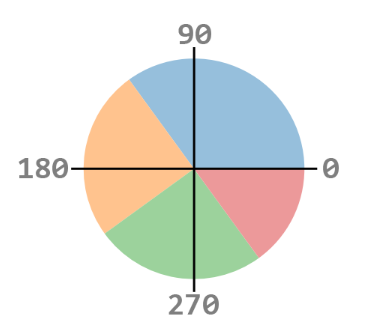

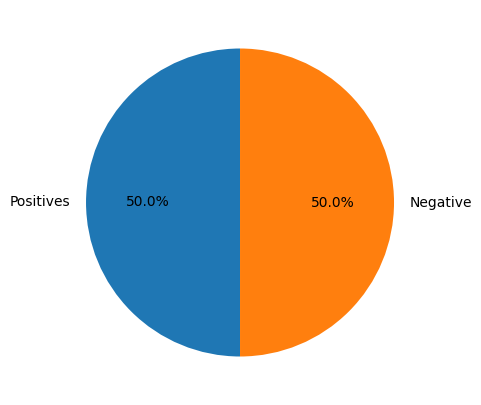

In [14]:
# plot a pie chart of positive and negative tweets
fig = plt.figure(figsize=(5, 5))

data = [len(positive_tweets), len(negative_tweets)] 
labels = 'Positives', 'Negative'
plt.pie(data, labels=labels, autopct='%2.1f%%', startangle=90)

plt.show()

## Looking at raw texts

print one random positive and one random negative tweet.
We have added a color mark at the beginning of the string to further distinguish the two. (Warning: This is taken from a public dataset of real tweets and a very small portion has explicit content.)

In [15]:
# looking at random tweets
print(positive_tweets[np.random.randint(0,5000)])

@StartupLJackson If someone builds a quantum computer, we're going to have far greater problems than the collapse of the blockchain :)


In [16]:
# https://stackoverflow.com/questions/17771287/python-octal-escape-character-033-from-a-dictionary-value-translates-in-a-prin
# print positive in green
print('\033[92m' + positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + negative_tweets[random.randint(0,5000)])

@Monomarchos dead :D
facebook, y u no work ? y u do this facebook ? :(


One observation you may have is the presence of [emoticons](https://en.wikipedia.org/wiki/Emoticon) and URLs in many of the tweets. This info will come in handy in the next steps.

## Preprocess raw text for Sentiment analysis

https://berkeley-stat159-f17.github.io/stat159-f17/lectures/11-strings/11-nltk..html#First-pass

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming



In [17]:
# nltk.download('stopwords')

In [18]:
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming

### Claeaning-> Remove hyperlinks,  Twitter marks and styles

Remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

Task- Look at the tweets and remove unnecessary characters

In [19]:
# https://towardsdatascience.com/regular-expressions-clearly-explained-with-examples-822d76b037b4#:~:text=Regular%20expression%20is%20not%20a,space%20characters%20to%20special%20characters.
tweet = positive_tweets[random.randint(0,5000)]
print('\033[92m' + tweet)
print('\033[94m')
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

@team_sharapova @MariaSharapova @Sugarpova @CowEvents your lil bro...ES corner? :)

@team_sharapova @MariaSharapova @Sugarpova @CowEvents your lil bro...ES corner? :)


### Tokenize the string
Tokenization is the process by which a large quantity of text is divided into smaller parts called tokens. These tokens are very useful for finding patterns and are considered as a base step for stemming and lemmatization. T

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily:

Extra:
    sentence and word tokenizer
   

In [20]:
# Examples to practice-> sentence and word tokenizer

In [21]:
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer

In [22]:
text = '''In the 75th year of our Independence, the world has recognised the
Indian economy as a ‘bright star’. Our current year’s economic growth is
estimated to be at 7 per cent. It is notable that this is the highest among all
the major economies. This is in spite of the massive slowdown globally
caused by Covid-19 and a war. The Indian economy is therefore on the right
track, and despite a time of challenges, heading towards a bright future. 
'''
print(sent_tokenize(text))

['In the 75th year of our Independence, the world has recognised the\nIndian economy as a ‘bright star’.', 'Our current year’s economic growth is\nestimated to be at 7 per cent.', 'It is notable that this is the highest among all\nthe major economies.', 'This is in spite of the massive slowdown globally\ncaused by Covid-19 and a war.', 'The Indian economy is therefore on the right\ntrack, and despite a time of challenges, heading towards a bright future.']


In [23]:
sentences=sent_tokenize(text)
lst=[]
for sen in sentences:
    word=word_tokenize(sen)
    lst.append(word)
    
print(lst)

[['In', 'the', '75th', 'year', 'of', 'our', 'Independence', ',', 'the', 'world', 'has', 'recognised', 'the', 'Indian', 'economy', 'as', 'a', '‘', 'bright', 'star', '’', '.'], ['Our', 'current', 'year', '’', 's', 'economic', 'growth', 'is', 'estimated', 'to', 'be', 'at', '7', 'per', 'cent', '.'], ['It', 'is', 'notable', 'that', 'this', 'is', 'the', 'highest', 'among', 'all', 'the', 'major', 'economies', '.'], ['This', 'is', 'in', 'spite', 'of', 'the', 'massive', 'slowdown', 'globally', 'caused', 'by', 'Covid-19', 'and', 'a', 'war', '.'], ['The', 'Indian', 'economy', 'is', 'therefore', 'on', 'the', 'right', 'track', ',', 'and', 'despite', 'a', 'time', 'of', 'challenges', ',', 'heading', 'towards', 'a', 'bright', 'future', '.']]


In [24]:
text

'In the 75th year of our Independence, the world has recognised the\nIndian economy as a ‘bright star’. Our current year’s economic growth is\nestimated to be at 7 per cent. It is notable that this is the highest among all\nthe major economies. This is in spite of the massive slowdown globally\ncaused by Covid-19 and a war. The Indian economy is therefore on the right\ntrack, and despite a time of challenges, heading towards a bright future. \n'

In [25]:
words= [word_tokenize(sen) for sen in sent_tokenize(text)]
words

[['In',
  'the',
  '75th',
  'year',
  'of',
  'our',
  'Independence',
  ',',
  'the',
  'world',
  'has',
  'recognised',
  'the',
  'Indian',
  'economy',
  'as',
  'a',
  '‘',
  'bright',
  'star',
  '’',
  '.'],
 ['Our',
  'current',
  'year',
  '’',
  's',
  'economic',
  'growth',
  'is',
  'estimated',
  'to',
  'be',
  'at',
  '7',
  'per',
  'cent',
  '.'],
 ['It',
  'is',
  'notable',
  'that',
  'this',
  'is',
  'the',
  'highest',
  'among',
  'all',
  'the',
  'major',
  'economies',
  '.'],
 ['This',
  'is',
  'in',
  'spite',
  'of',
  'the',
  'massive',
  'slowdown',
  'globally',
  'caused',
  'by',
  'Covid-19',
  'and',
  'a',
  'war',
  '.'],
 ['The',
  'Indian',
  'economy',
  'is',
  'therefore',
  'on',
  'the',
  'right',
  'track',
  ',',
  'and',
  'despite',
  'a',
  'time',
  'of',
  'challenges',
  ',',
  'heading',
  'towards',
  'a',
  'bright',
  'future',
  '.']]

In [26]:
Ex1 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <-- @remy: This is waaaaayyyy too much for you!!!!!!"
Ex2 = "I have a B.Tech degree in C.S.E"
Ex3 = "A 5km ride costed us 500$"
Ex4 = "Is that your address abc@upes.ac.in"

In [27]:
print(word_tokenize(Ex3), end='\n\n')

obj=TweetTokenizer()
print(obj.tokenize(Ex3))

['A', '5km', 'ride', 'costed', 'us', '500', '$']

['A', '5km', 'ride', 'costed', 'us', '500', '$']


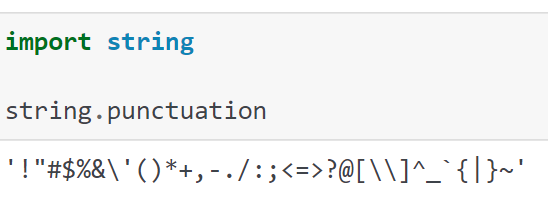

https://www.nltk.org/api/nltk.tokenize.html

In [28]:
# tweet= positive_tweets[random.randint(0,5000)]
# print(tweet, end = '\n\n')

print(word_tokenize(tweet),end = '\n\n')
print(obj.tokenize(tweet))

['@', 'team_sharapova', '@', 'MariaSharapova', '@', 'Sugarpova', '@', 'CowEvents', 'your', 'lil', 'bro', '...', 'ES', 'corner', '?', ':', ')']

['@team_sharapova', '@MariaSharapova', '@Sugarpova', '@CowEvents', 'your', 'lil', 'bro', '...', 'ES', 'corner', '?', ':)']


In [29]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


@team_sharapova @MariaSharapova @Sugarpova @CowEvents your lil bro...ES corner? :)


Tokenized string:
['your', 'lil', 'bro', '...', 'es', 'corner', '?', ':)']


### Remove stop words and punctuations

The next step is to remove stop words and punctuation. 
Stop words are words that don't add significant meaning to the text.

In [30]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We can see that the stop words list above contains some words that could be important in some contexts. 
These could be words like _i, not, between, because, won, against_. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...'  should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Time to clean up our tokenized tweet!

In [31]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  word not in string.punctuation):  
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['your', 'lil', 'bro', '...', 'es', 'corner', '?', ':)']

removed stop words and punctuation:
['lil', 'bro', '...', 'es', 'corner', ':)']


Please note that the words **happy** and **sunny** in this list are correctly spelled. 

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [32]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
obj = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = obj.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['lil', 'bro', '...', 'es', 'corner', ':)']

stemmed words:
['lil', 'bro', '...', 'es', 'corner', ':)']


That's it! Now we have a set of words we can feed into to the next stage of our machine learning project.

## process_tweet()

As shown above, preprocessing consists of multiple steps before you arrive at the final list of words. We will not ask you to replicate these however. In the week's assignment, you will use the function `process_tweet(tweet)` available in _utils.py_. We encourage you to open the file and you'll see that this function's implementation is very similar to the steps above.

To obtain the same result as in the previous code cells, you will only need to call the function `process_tweet()`. Let's do that in the next cell.

In [33]:
# create dict from text file
full_form= {}

In [34]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation): 
            stem_word = stemmer.stem(word)  
            tweets_clean.append(stem_word)

    return tweets_clean

In [35]:
pos_tokens=[process_tweet(tweet) for tweet in positive_tweets]
neg_tokens=[process_tweet(tweet) for tweet in negative_tweets]

# Additional steps

In [36]:

# # code for converting short form to full form
# def full_form(tweet):
#     new_tweet=[]
#     for word in tweet.split():
#         #             check for full forms
#         if word.upper in full_form:
#             new_tweet.append(full_form[word.upper()])
#         else:
#             new_tweet.append(word)
            
#     return " ".join(new_tweet)

In [37]:
# !pip install textblob

In [38]:
# speel correction-> using TextBlob, or spacy, nltk etc.
# from textblob import TextBlob
# txt=TextBlob("find notebuk retun ntebook")
# txt.correct().string

In [39]:
# remove emojis
# !pip install emoji
# import emoji
# emoji.demojize('learning is fun 🤣')

In [40]:
positive_tweets[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'